Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline

Cargamos los datasets de train y test

In [2]:
df_train = pd.read_csv('ChallengeFiles\\TrainMyriad.csv')
df_test = pd.read_csv('ChallengeFiles\\TestMyriad.csv')

Obtenemos el shuffled train dataset y le separamos en X_train (features dataset) e y_train (classes dataset)

In [3]:
df_train = shuffle(df_train)#, random_state=0)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

Generamos algunas visualizaciones del training dataset

In [4]:
from utils.visualization import visualization
viz = visualization(X_train, y_train)

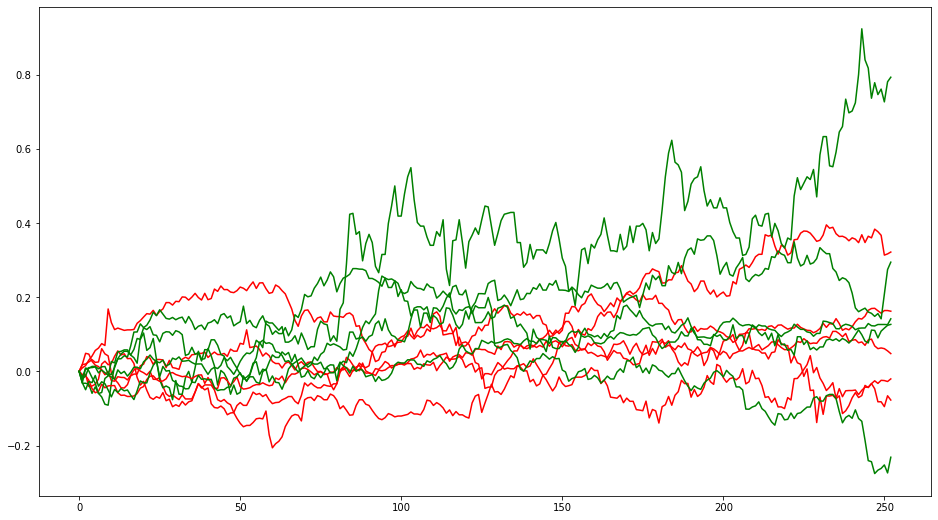

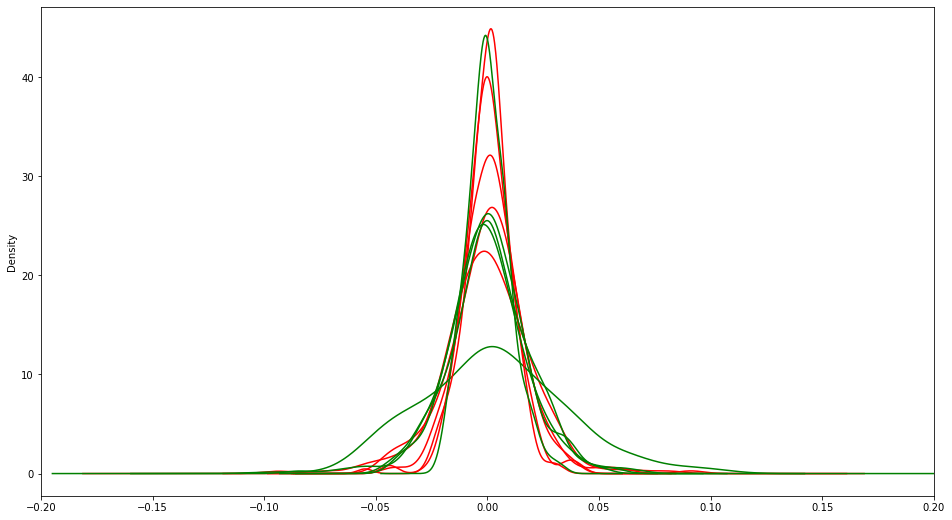

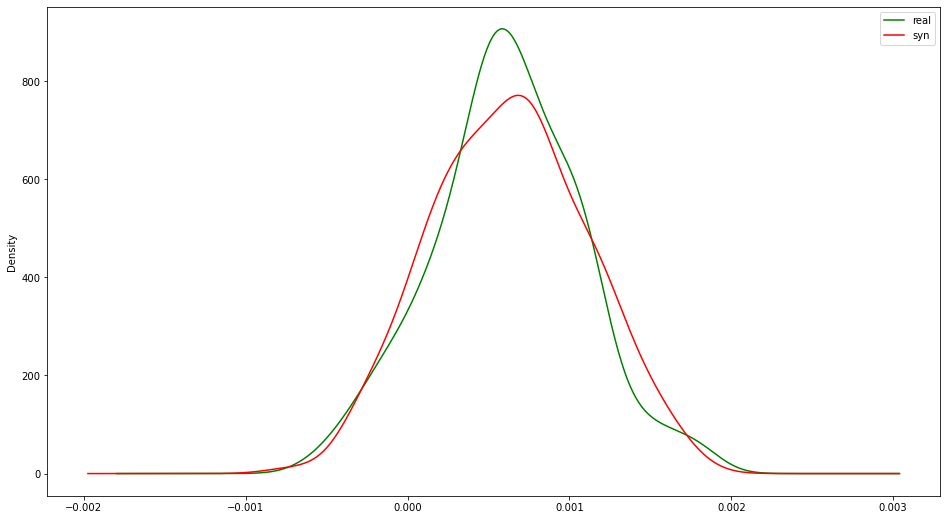

In [5]:
viz.plot_series()
viz.plot_density()
viz.plot_mean_density()

Importamos la clase modeling para estudiar el AUC en el entrenamiento de los modelos

In [6]:
from utils.modeling import modeling

Estudiamos los resultados del algorítmo Extreme Gradient Boosting como clasificador

In [7]:
import xgboost as xgb
model_xg = modeling(xgb.XGBClassifier(), X_train, y_train, df_test)

Mean AUC training sub-training set cross-validation score: 0.51
[0.50516668 0.49284833 0.5064124  0.51689046 0.52673233]
AUC training sub-testing set score: 0.51


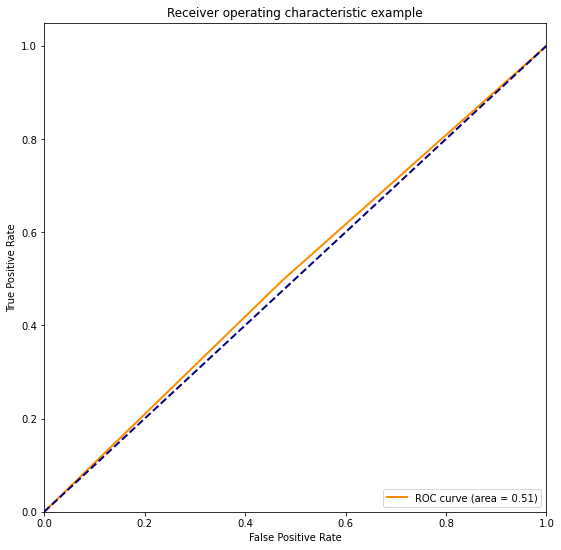

Mean AUC training set cross-validation score: 0.52
[0.51181772 0.52017376 0.50629905 0.52793117 0.51560624]


In [8]:
model_xg.cv(cv_train=True)
model_xg.cv(cv_train=False)

Entrenamos y predecimos nuestro conjunto de test con el algorítmo Extreme Gradient Boosting

In [9]:
model_xg.fit_data()
y_pred_xg = model_xg.predict_data()